In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [4]:
df1 = pd.read_csv('Outlet-r.csv') # Reading Data
df2 = pd.read_csv('Outlet-s.csv')
df3 = pd.read_csv('Outlet-t.csv')
df4 = pd.read_csv('Outlet-u.csv')

df1 = df1.head(24866)
df2 = df2.head(20120)
df3 = df3.head(13148)
df4 = df4.head(56898)

# Converting to datetime datatype
df1['TransactionDateTime1'] = pd.to_datetime(df1['TransactionDateTime1'], infer_datetime_format=True) 
df2['TransactionDateTime1'] = pd.to_datetime(df2['TransactionDateTime1'], infer_datetime_format=True)
df3['TransactionDateTime1'] = pd.to_datetime(df3['TransactionDateTime1'], infer_datetime_format=True)
df4['TransactionDateTime1'] = pd.to_datetime(df4['TransactionDateTime1'], infer_datetime_format=True)

In [5]:
# Grouping on Outlet Number, Pump Number, Transaction Hour and aggregating the Quantity
d1 = df1.groupby([df1['OutletNumber'], df1['PumpNumber1'], df1['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d2 = df2.groupby([df2['OutletNumber'], df2['PumpNumber1'], df2['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d3 = df3.groupby([df3['OutletNumber'], df3['PumpNumber1'], df3['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d4 = df4.groupby([df4['OutletNumber'], df4['PumpNumber1'], df4['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})

frames = [d1, d2, d3, d4]
d = pd.concat(frames) # Combining all the outlets

In [6]:
# Converting the transactions hour into columns via pivot table
p = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1')

ph = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1').reset_index()

p.replace(np.nan, 0.00, inplace = True) # Replacing the null values with 0.00
p.head(10)

TransactionDateTime1          0       1       2      3       4       5   \
OutletNumber PumpNumber1                                                  
Outlet-r     1              0.00    0.00    0.00   0.00    0.00    0.00   
             2              0.00    0.00    0.00   0.49    0.00    1.08   
             3            231.45   87.27   80.76  61.83  118.17  117.74   
             4              4.39    1.16    0.48   0.00    0.00    0.00   
             5            244.95  185.71  102.16  11.11  231.31  220.27   
             6             43.28   27.83   61.77  56.52  107.90  140.69   
             7            273.45   97.57   52.16  16.45  109.03  166.05   
             8              1.88   11.05   10.85   4.25    8.82    5.98   
             9              0.00    0.00    0.00   0.00    0.00    0.00   
             10             0.00    0.00    0.00   0.00    0.00    0.00   

TransactionDateTime1          6       7        8        9   ...       14  \
OutletNumber PumpNumber1                                    ...            
Outlet-r     1            149.63  629.37   854.01  2032.80  ...  2035.29   
             2              0.10    5.07    56.01   224.36  ...   110.31   
             3            315.21  211.25   325.67   801.26  ...   559.93   
             4              3.70   69.28   150.58   465.25  ...   144.65   
             5            349.77  325.31   640.38   413.45  ...   257.21   
             6             57.48   95.73   201.63   496.60  ...   137.96   
             7            409.95  686.43  1115.92  1501.16  ...  1494.30   
             8             26.52  101.04   199.08   357.33  ...   153.10   
             9            109.77  286.19   428.45  1239.52  ...   977.72   
             10            70.58   30.89    47.94    79.48  ...    84.62   

TransactionDateTime1           15       16       17       18       19  \
OutletNumber PumpNumber1                                                
Outlet-r     1            2118.44  1812.87  2282.87  2860.89   163.94   
             2              84.46   109.81    60.92   110.43     0.00   
             3             706.93   741.26   814.55  1729.43  2484.40   
             4             123.05   192.97   106.85   295.51    47.92   
             5             205.50   310.69   422.57  1095.06  2615.33   
             6             103.97   179.58   383.96   315.71  1601.56   
             7            1194.53  1277.20  1463.54  1925.24  4153.60   
             8             113.18   125.57   158.04   258.77    68.93   
             9             658.01   645.45   804.79  1299.30   159.08   
             10             72.15    10.06   108.91    24.05   138.22   

TransactionDateTime1           20       21      22      23  
OutletNumber PumpNumber1                                    
Outlet-r     1               0.00     0.00    0.00    0.00  
             2               0.00     0.00    0.00    0.00  
             3            1722.39   980.30  990.79  564.84  
             4             122.84    36.72   13.61    8.32  
             5            1343.69   862.11  460.06  161.66  
             6            1358.77   772.57  295.24  238.81  
             7            2599.11  1108.38  589.31  482.51  
             8              34.75    32.95   10.95   39.61  
             9               0.00     0.00    0.00    0.00  
             10             33.67     0.00   60.00   71.79  

[10 rows x 24 columns]

In [7]:
da = p.max(axis = 1).reset_index() # Retreiving the maximum volume of each pump 
da.columns = ['OutletNumber', 'PumpNumber1', 'Quantity1']

db = p.idxmax(axis = 1).reset_index() # Retreiving the hour at which the pump has maximum volume
db.columns =  ['OutletNumber', 'PumpNumber1', 'TransactionDateTime1']

c = pd.merge(da, db) # Merging the table of maximum volume of each pump and at what hour of all outlets 
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
0,Outlet-r,1,3398.83,11
1,Outlet-r,2,237.99,12
2,Outlet-r,3,2484.40,19
3,Outlet-r,4,465.25,9
4,Outlet-r,5,2615.33,19
5,Outlet-r,6,1601.56,19
6,Outlet-r,7,4153.60,19
7,Outlet-r,8,357.33,9
8,Outlet-r,9,1838.67,10
9,Outlet-r,10,177.67,12


In [8]:
x = c.iloc[:, [1, 2, 3]].values
kmean = KMeans(n_clusters=3)
y_kmeans = kmean.fit_predict(x) # Categorised the clusters 
print(y_kmeans)
c['Category'] = y_kmeans
c

[2 0 1 0 1 1 2 0 1 0 1 0 2 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 2 0 2 1 0 2
 2]


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
0,Outlet-r,1,3398.83,11,2
1,Outlet-r,2,237.99,12,0
2,Outlet-r,3,2484.40,19,1
3,Outlet-r,4,465.25,9,0
4,Outlet-r,5,2615.33,19,1
5,Outlet-r,6,1601.56,19,1
6,Outlet-r,7,4153.60,19,2
7,Outlet-r,8,357.33,9,0
8,Outlet-r,9,1838.67,10,1
9,Outlet-r,10,177.67,12,0


Text(0, 0.5, 'Error')

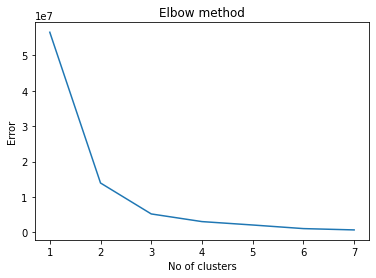

In [9]:
Error =[]
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 8), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
#plt.show()

Text(0, 0.5, 'Quantity')

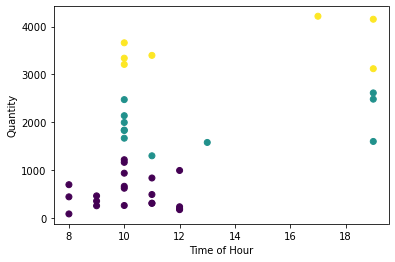

In [10]:
plt.scatter(x = c['TransactionDateTime1'], y = c['Quantity1'], c = y_kmeans) # clustered data plot
plt.xlabel('Time of Hour')
plt.ylabel('Quantity')

In [11]:
c.sort_values(['Quantity1'], ascending = False, inplace = True)
med = c['Quantity1'].median()
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
37,Outlet-u,15,4216.04,17,2
6,Outlet-r,7,4153.60,19,2
12,Outlet-r,13,3661.54,10,2
0,Outlet-r,1,3398.83,11,2
36,Outlet-u,13,3340.32,10,2
33,Outlet-u,7,3209.77,10,2
31,Outlet-u,5,3120.75,19,2
4,Outlet-r,5,2615.33,19,1
2,Outlet-r,3,2484.40,19,1
15,Outlet-r,16,2475.26,10,1


In [12]:
c1 = c[c['Quantity1'] > med] 
c2 = c1.groupby([c['OutletNumber']])['OutletNumber'].count()
c2.idxmax(axis = 1)

'Outlet-r'

In [13]:
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
37,Outlet-u,15,4216.04,17,2
6,Outlet-r,7,4153.60,19,2
12,Outlet-r,13,3661.54,10,2
0,Outlet-r,1,3398.83,11,2
36,Outlet-u,13,3340.32,10,2
33,Outlet-u,7,3209.77,10,2
31,Outlet-u,5,3120.75,19,2
4,Outlet-r,5,2615.33,19,1
2,Outlet-r,3,2484.40,19,1
15,Outlet-r,16,2475.26,10,1
